In [1]:
print("""
@Title: Modeling an autoregressive process
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-12-01 21:42:50
@Description: 
""")


@Title: Modeling an autoregressive process
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-12-01 21:42:50
@Description: 



## Simulate an AR(2) process and make forecasts

In [4]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)

ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -.33, -.5])

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

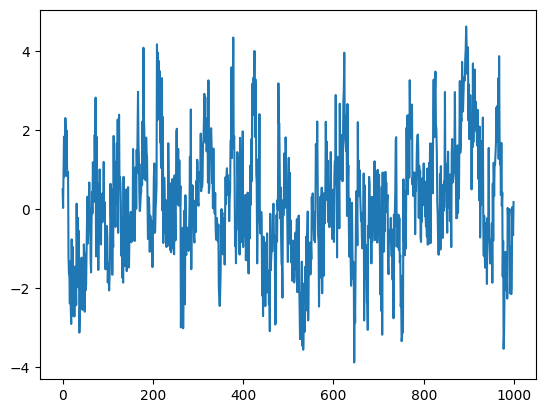

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(AR2_process)

In [7]:
from statsmodels.tsa.stattools import adfuller

adfuller(AR2_process)

(-7.566606021416907,
 2.9145161293762553e-11,
 1,
 998,
 {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573},
 2738.246771318533)

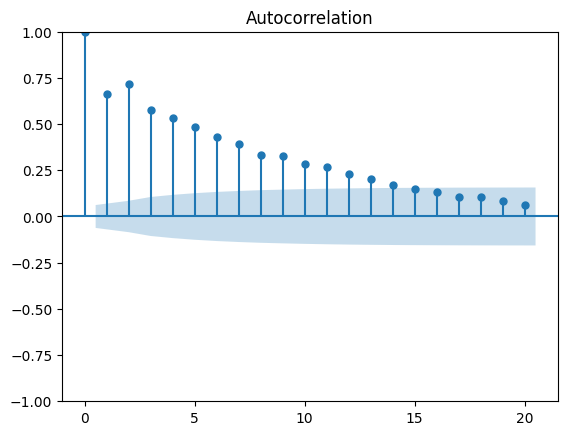

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(AR2_process, lags=20)

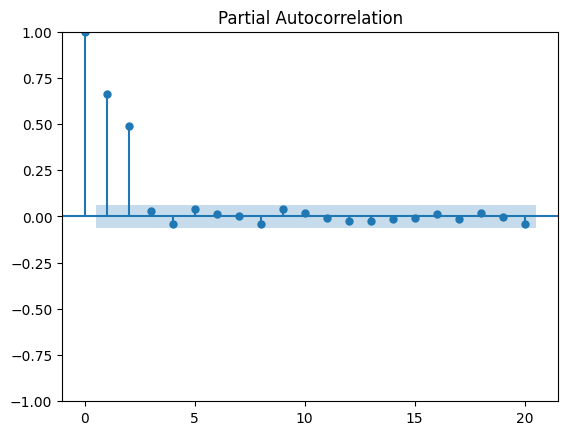

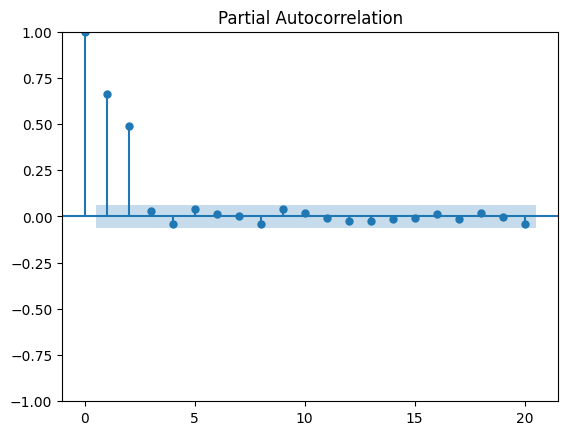

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(AR2_process, lags=20)

In [12]:
import pandas as pd

df = pd.DataFrame({'value': AR2_process})
train = df[:800]
test = df[800:].copy()

In [16]:
from utils.rolling_forecast import rolling_forecast

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

test.loc[:, 'pred_mean'] = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
test.loc[:, 'pred_last'] = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'last')
test.loc[:, 'pred_AR'] = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'AR')

In [18]:
test.head()

,value,pred_mean,pred_last,pred_AR
800,1.153388,-0.049737,0.461912,0.221317
801,0.095529,-0.049737,0.461912,0.290105
802,0.704340,-0.048056,0.095529,0.587501
803,-0.182079,-0.048056,0.095529,0.256042
804,-0.142412,-0.047287,-0.182079,0.280298


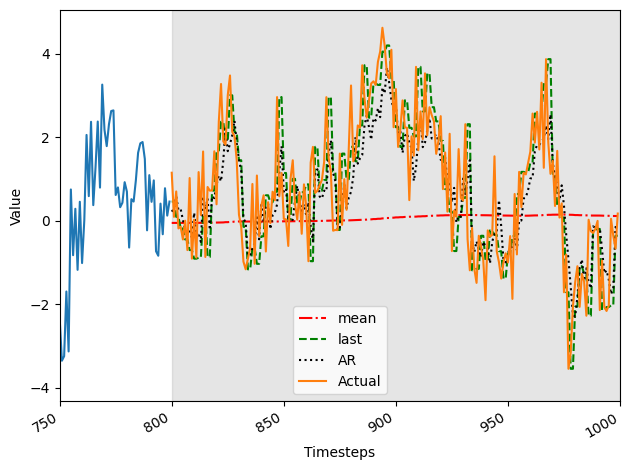

In [25]:
from utils.ts_plot import plot_pred

fig, ax = plot_pred(test, ways=['mean', 'last', 'AR'])
ax.plot(train)
ax.plot(test['value'], label='Actual')
ax.legend()
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.xlim(750, 1000)
fig.autofmt_xdate()
plt.tight_layout()

In [27]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_ar = mean_squared_error(test['value'], test['pred_AR'])

mse_mean, mse_last, mse_ar

(3.0882016808214443, 1.2111519051869672, 0.9691013344993235)

(0.0, 4.0)

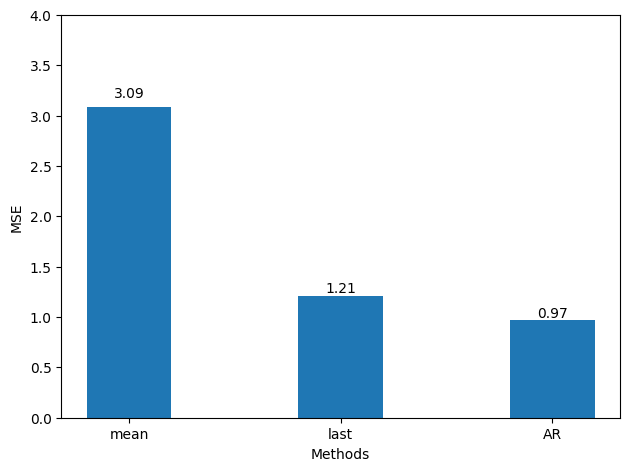

In [31]:
from utils.ts_plot import plot_metrics_compare

fig, ax = plot_metrics_compare(x=['mean', 'last', 'AR'],
                               y=[mse_mean, mse_last, mse_ar])
ax.set_ylim(0, 4)

## Simulate an AR(p) process and make forecasts